<a href="https://colab.research.google.com/github/Patrickmutuku/Tomato_Leaf_Mold_Disease_Detection/blob/main/Tomato_Leaf_mold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
# My data is in google drive.
train_dir ="drive/My Drive/tomato/train/"
test_dir="drive/My Drive/tomato/val/"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

2 Classes
2000 Train images
210 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 2000 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Tomato___Leaf_Mold': 0, 'Tomato___healthy': 1}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


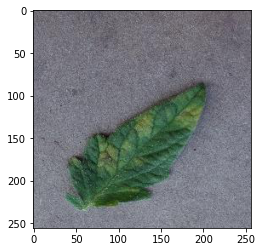

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/tomato/train/Tomato___Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/tomato/train/Tomato___Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
#max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
#flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
#conv2d_3_features = conv2d_3_output.predict(img)
#max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
#flatten_1_features = flatten_1_output.predict(img)

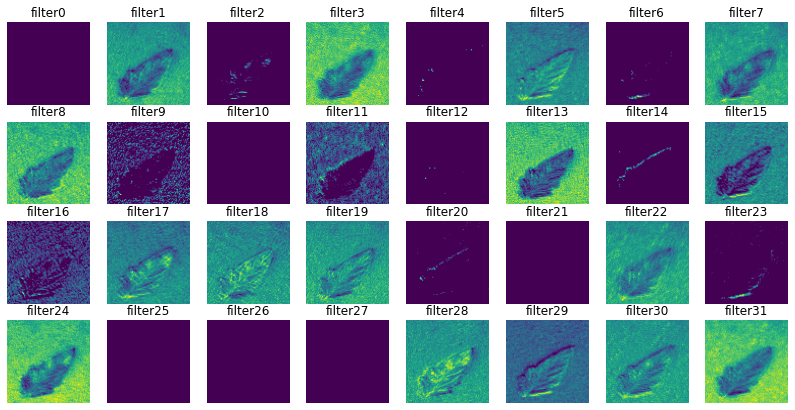

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

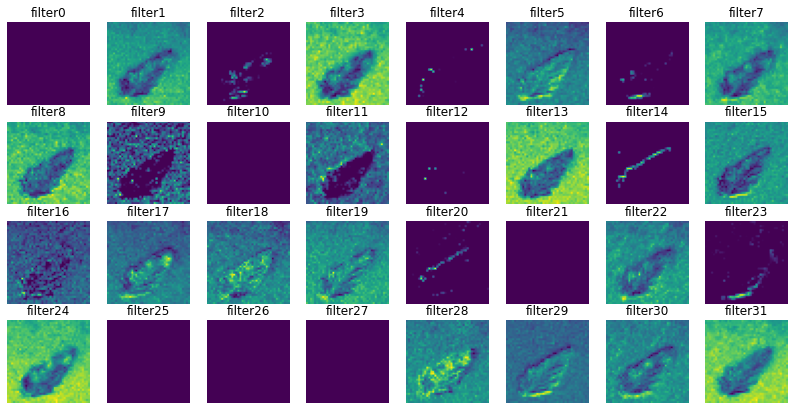

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

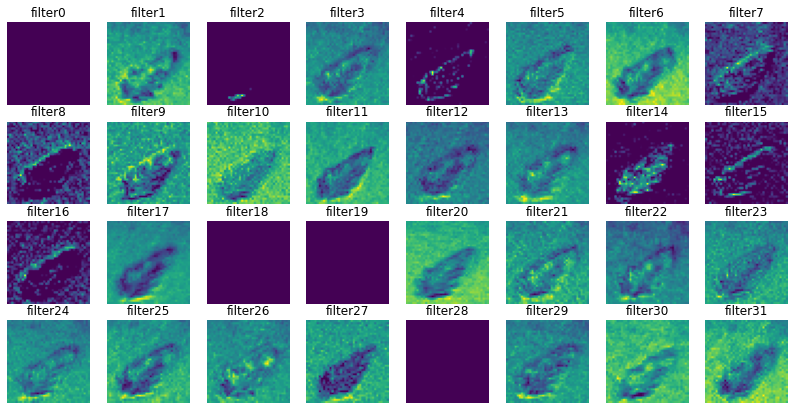

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

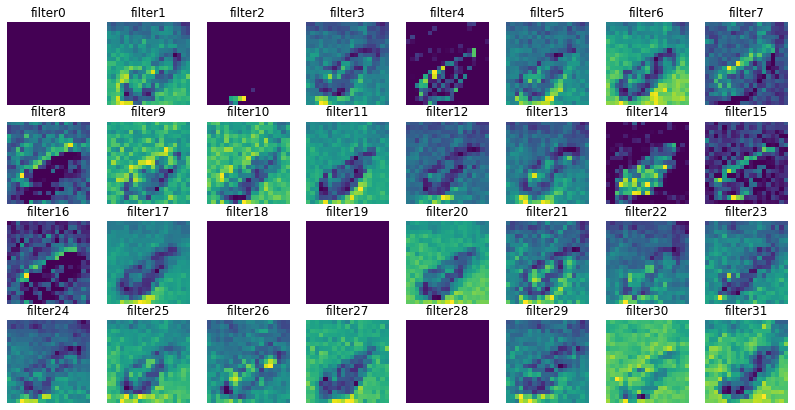

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 2000 images belonging to 2 classes.


In [ ]:
# Model building to get trained with parameters.
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/15
62/62 [==============================] - 488s 8s/step - loss: 0.7197 - accuracy: 0.5742 - val_loss: 0.5652 - val_accuracy: 0.7177
Epoch 2/15
62/62 [==============================] - 63s 1s/step - loss: 0.4502 - accuracy: 0.7851 - val_loss: 0.2424 - val_accuracy: 0.9274
Epoch 3/15
62/62 [==============================] - 63s 1s/step - loss: 0.2412 - accuracy: 0.9050 - val_loss: 0.1510 - val_accuracy: 0.9541
Epoch 4/15
62/62 [==============================] - 62s 1s/step - loss: 0.1820 - accuracy: 0.9294 - val_loss: 0.0723 - val_accuracy: 0.9703
Epoch 5/15
62/62 [==============================] - 62s 1s/step - loss: 0.1460 - accuracy: 0.9365 - val_loss: 0.0707 - val_accuracy: 0.9698
Epoch 6/15
62/62 [==============================] - 62s 1s/step - loss: 0.1282 - accuracy: 0.9517 - val_loss: 0.2067 - val_accuracy: 0.9007
Epoch 7/15
Epoch 7/15
62/62 [==============================] - 63s 1s/step - loss: 0.1047 - accuracy: 0.9624 - val_loss: 0.0345 - val_accuracy: 0.9934
Epoch 8/

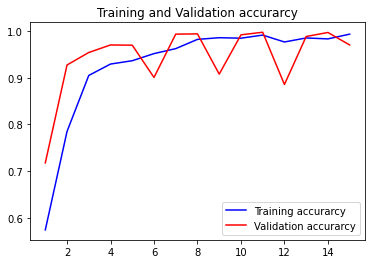

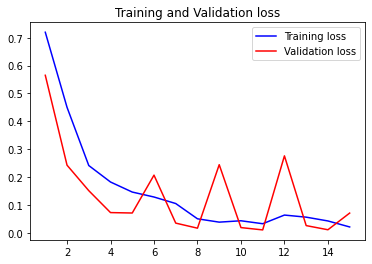

In [ ]:
accuracy = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

7/7 [==============================] - 41s 7s/step - loss: 0.0471 - accuracy: 0.9762
Test score is 0.04709095135331154
Test accuracy is 0.976190447807312


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Tomato___Leaf_Mold': 0, 'Tomato___healthy': 1}

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Tomato___Leaf_Mold","Tomato___healthy"]


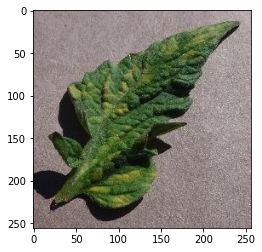

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/tomato/val/Tomato___Leaf_Mold/0b3d5bf2-607f-4f95-bdcd-3542b8bd3244___Crnl_L.Mold 6654.JPG')])
disease=image.load_img('/content/drive/MyDrive/tomato/val/Tomato___Leaf_Mold/0b3d5bf2-607f-4f95-bdcd-3542b8bd3244___Crnl_L.Mold 6654.JPG')
plt.imshow(disease)
#print (Classes[float(result)])

In [61]:
# WHOLE MODEL
tflite_model = tf.keras.models.load_model('crop.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("model.tflite", "wb").write(tflite_save)


INFO:tensorflow:Assets written to: /tmp/tmpzbmaz0r5/assets


INFO:tensorflow:Assets written to: /tmp/tmpzbmaz0r5/assets


47707428